<a href="https://colab.research.google.com/github/richeym-umich/workshops/blob/main/Machine_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Reinforcement Learning**



The following is an example of a reinforcement learning application. The functions are predefined, and we will step through running each part of the code

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

First, we define a list of points by their connections

In [ ]:
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

Next, we add the points to a graph and visualize the graph

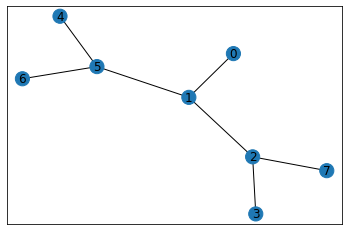

In [ ]:
goal = 7
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

Next, we create our reward matrix

In [5]:
MATRIX_SIZE = 8

#create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

#assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point]=0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        R[point[::-1]] = 0

R[goal,goal] = 100

Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


Set our learning parameter and initial state

In [6]:
#learning parameter
gamma = 0.8

initial_state = 1

Function to find our available actions from our current state

In [7]:
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)

Choose our next action from our current state and available actions

In [8]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act, 1))
    return next_action

action = sample_next_action(available_act)

Update the state of our actor with our chosen action

In [9]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)

    max_value = Q[action, max_index]

    Q[current_state,action] = R[current_state, action] + gamma*max_value
    print('max_value', R[current_state,action] + gamma*max_value)

    if(np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return(0)
update(initial_state, action, gamma)

max_value 0.0


0

Now that our code has been set up, we need to train our reinforcement learning model

In [10]:
#Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print('Score: ', str(score))

print("Trained Q matrix: ")
print(Q/np.max(Q)*100)

max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 0.0
Score:  0
max_value 100.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 0.0
Score:  100.0
max_value 180.0
Score:  155.55555555555554
max_value 180.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 0.0
Score:  155.55555555555554
max_value 144.0
Score:  235.55555555555554
max_value 0.0
S

Finally, we test our model and output the learning results

Most efficient path: 
[0, 1, 2, 7]


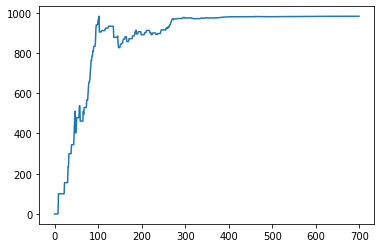

In [11]:
#Testing
current_state=0
steps = [current_state]

while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]

    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
print("Most efficient path: ")
print(steps)

plt.plot(scores)
plt.show()